In [1]:
# Importing Liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Dataset

ds = pd.read_csv("cleaned_data.csv")

# Visualizations By Graph

In [8]:
ds = ds.loc[:, ~ds.columns.str.contains('^Unnamed')]                # removing unnamed column

breast cancer prediction is typically considered a classification problem. The goal is to categorize tumors as either benign (non-cancerous) or malignant (cancerous)

In [15]:
ds.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

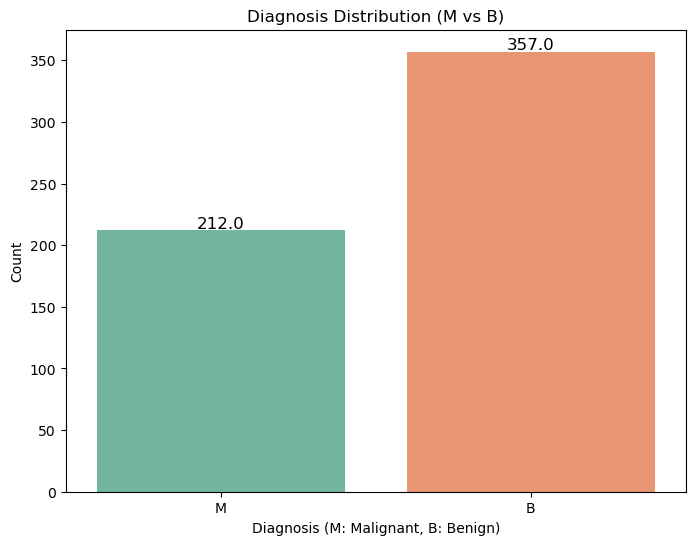

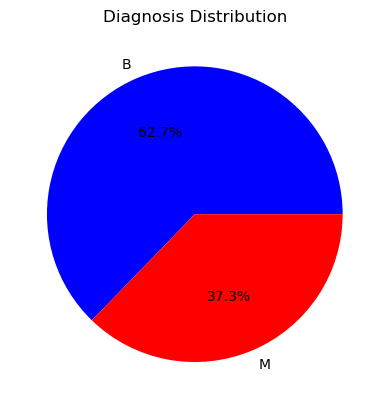

In [31]:
# Visualization 1: Count plot for the diagnosis (M vs B) with counts on top of the bars

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=ds, palette='Set2')

# Adding count labels on top of the bars

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Title and labels

plt.title('Diagnosis Distribution (M vs B)')
plt.xlabel('Diagnosis (M: Malignant, B: Benign)')
plt.ylabel('Count')

plt.show()

# Pie Chart
ds['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Diagnosis Distribution')
plt.ylabel('')  # Hide ylabel
plt.show()

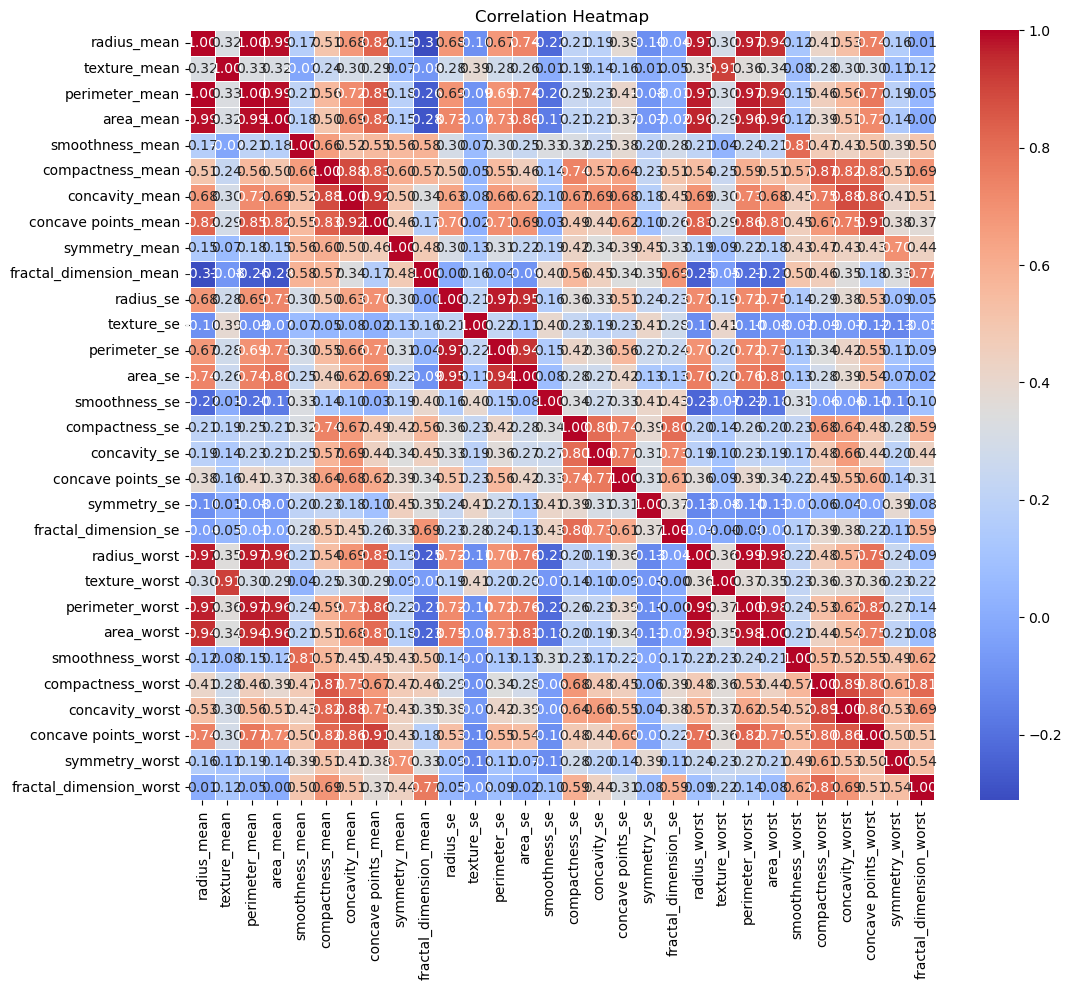

In [19]:
# Visualization 2: Correlation Heatmap between numerical features
# Calculate the correlation matrix

corr = ds.drop(['id', 'diagnosis'], axis=1).corr()

# Plot heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

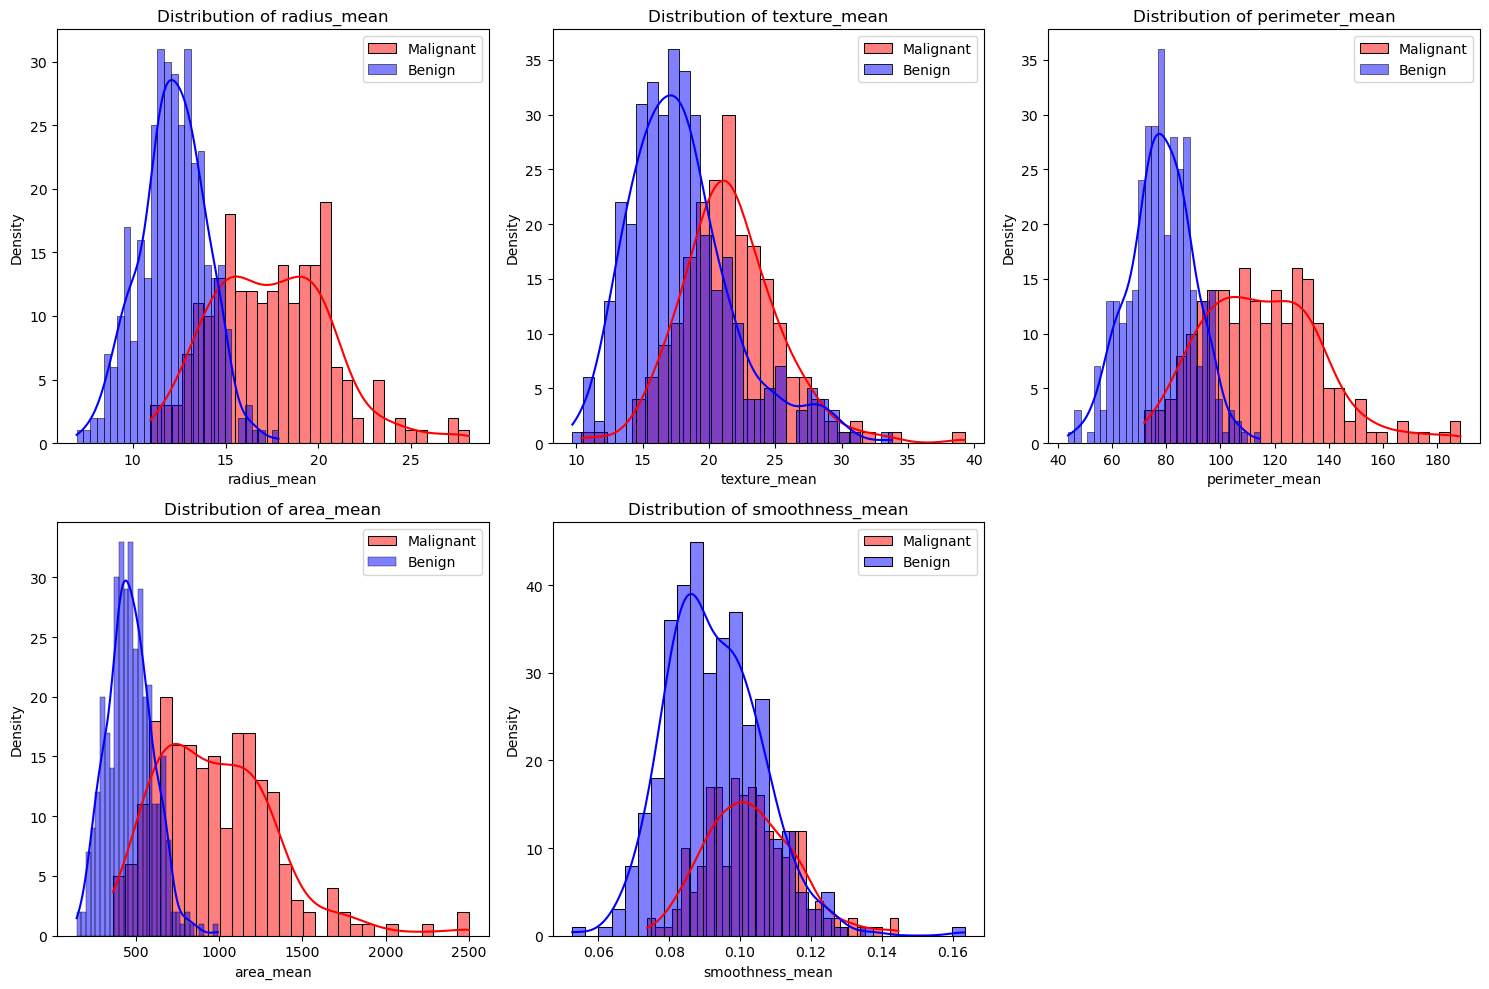

In [21]:
# Visualization 3: Distribution of numerical features based on diagnosis
# We will plot histograms for a few key features and compare distributions for malignant vs benign

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(ds[ds['diagnosis'] == 'M'][feature], color='red', kde=True, label='Malignant', bins=30)
    sns.histplot(ds[ds['diagnosis'] == 'B'][feature], color='blue', kde=True, label='Benign', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()

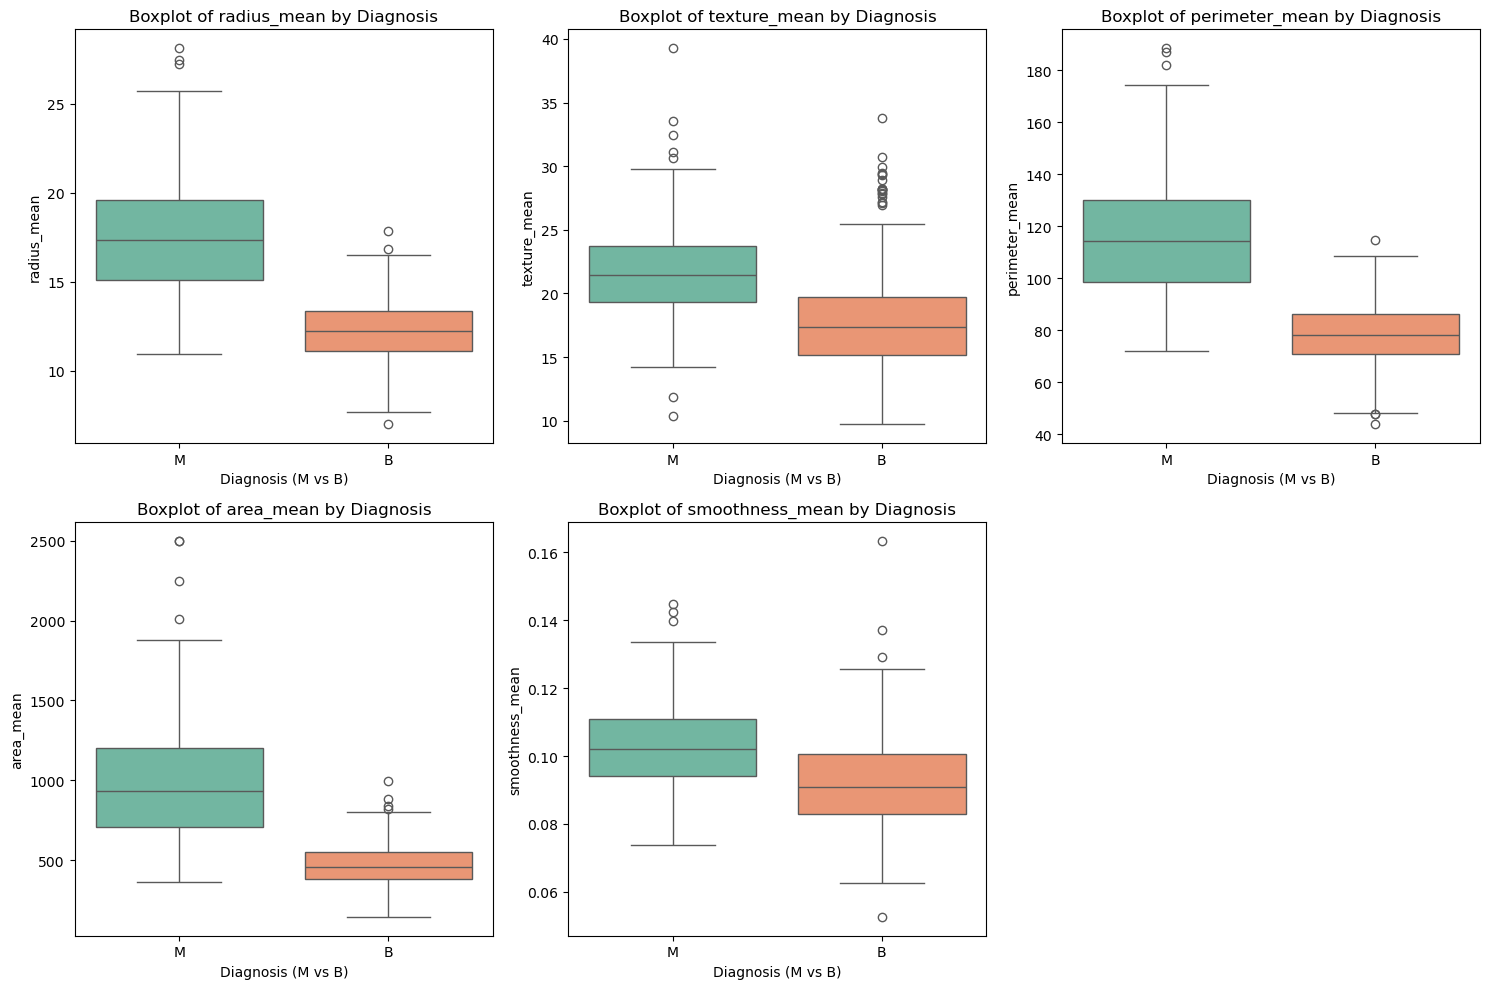

In [23]:
# Visualization 4: Boxplots to compare features across diagnosis (M vs B)

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=ds, palette='Set2')
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.xlabel('Diagnosis (M vs B)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

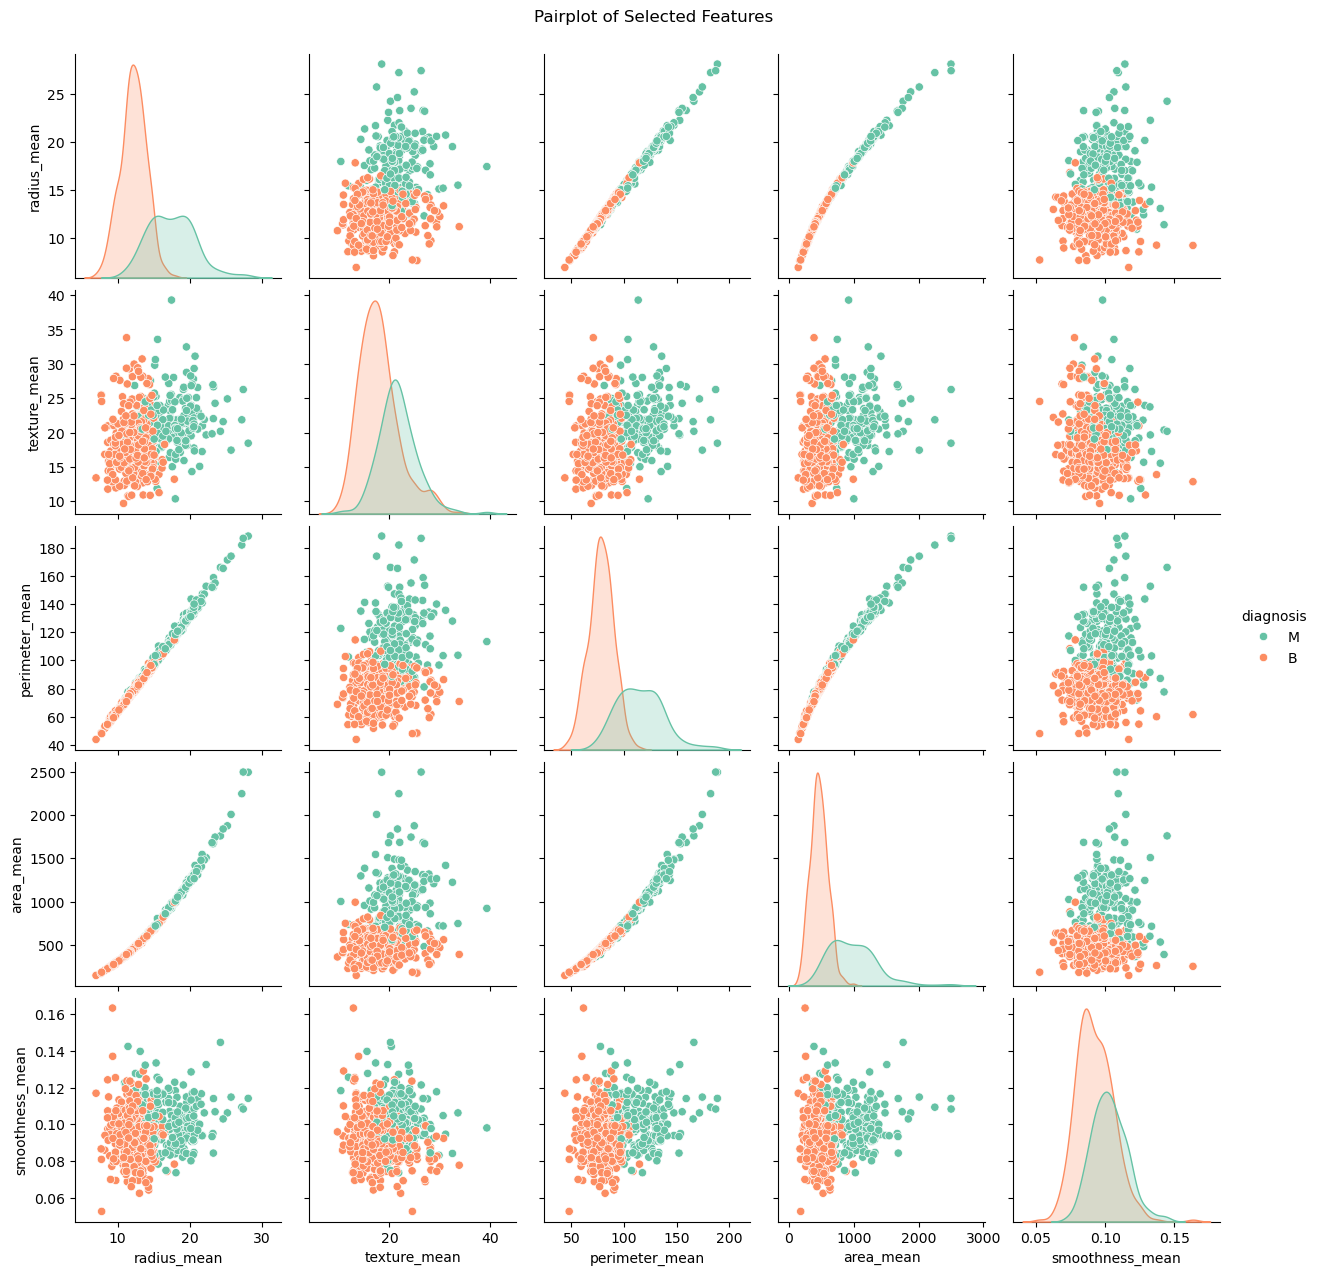

In [25]:
# Visualization 5: Pairplot of a few features
# This will help in visualizing pairwise relationships

sns.pairplot(ds[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']], hue='diagnosis', palette='Set2')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()